# Cartopy: An Introduction

There are a couple of different modules that can be used to plot geo-referenced data. Currently, the Cartopy module is the most commonly used (it's also the most flexible). This module allows us to plot 2D data on the various 2D representations of our roughly spherical earth. This is not a trivial problem to represent Earth-related data on a 2D plane. There are a number of different projections that could be used to create the 2D representation.

The essential projection for most of our meteorological data is the Plate Carree projection, which is based on lat/lon gridded network. If you have data in lat/lon format, then you can use the Plate Carree projection directly without any transformation.

## Loading the module
One of the main aspects that we need to account for to create a map is the map projection, so we are going to begin by bringing in the coordinate reference system (crs) from Caropty and set the projection to be a Plate Carree projection.


In [1]:
import matplotlib.pylab as plt
import cartopy.crs as ccrs

Since our data is cylindrical, it will be easy to use a cylindrical coordinate system (e.g., PlateCarree)

In [2]:
# Set a map coordinate reference
# Standard plot map for lat/lon data is PlateCarree
mapcrs = ccrs.PlateCarree()

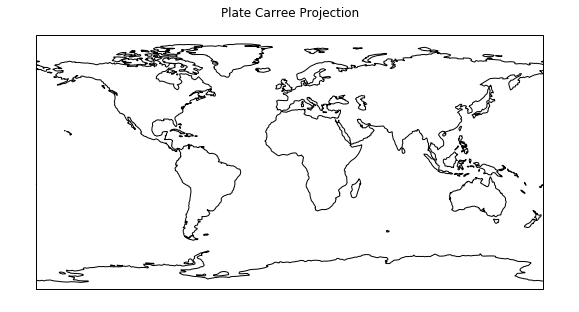

In [3]:
%matplotlib inline

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection=mapcrs)

ax.coastlines()

plt.title('Plate Carree Projection')
plt.show()

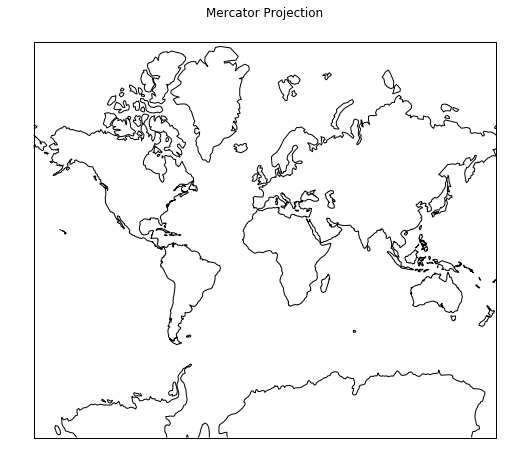

In [4]:
# Mercator Projection
mapcrs = ccrs.Mercator()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection=mapcrs)

ax.coastlines()

plt.title('Mercator Projection')
plt.show()

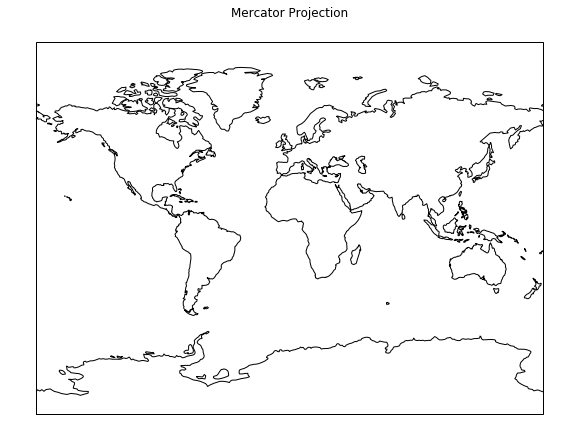

In [5]:
# Miller Projection
mapcrs = ccrs.Miller()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection=mapcrs)

ax.coastlines()

plt.title('Mercator Projection')
plt.show()

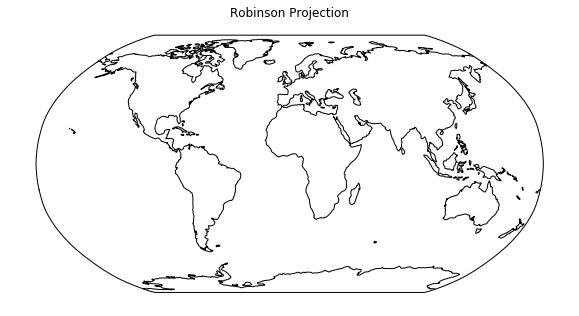

In [6]:
# Robsinson Projection
mapcrs = ccrs.Robinson(central_longitude=0)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection=mapcrs)

ax.coastlines()

plt.title('Robinson Projection')
plt.show()

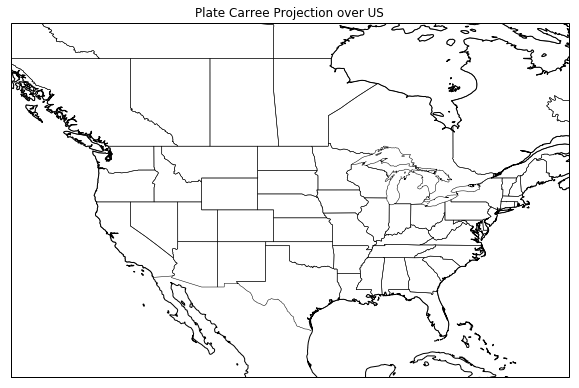

In [7]:
import cartopy.feature as cfeature

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lakes',
        scale='50m',
        facecolor='none')


mapcrs = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection=mapcrs)
ax.set_extent([-135, -65, 20, 60])
ax.coastlines('50m')

ax.add_feature(states_provinces,edgecolor='black',linewidth=0.5)

plt.title('Plate Carree Projection over US')
plt.show()

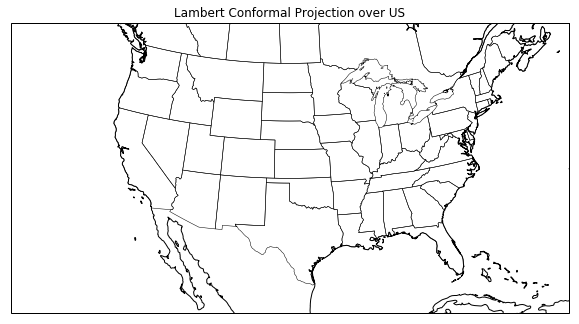

In [8]:
# Create the same map as above, but for a Lambert Conformal Projection
# Centered on -100E Longitude, 40N latitude

mapcrs = ccrs.LambertConformal(central_longitude=-100, central_latitude=40)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection=mapcrs)
ax.set_extent([-130, -70, 20, 50], ccrs.Geodetic())
ax.coastlines('50m')
ax.add_feature(states_provinces,edgecolor='black',linewidth=0.5)

plt.title('Lambert Conformal Projection over US')
plt.show()

## Plotting Data on a Map

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load data as per usual with the netCDF4 module
# Only change is that instead of a local or absolute address to the data
# you put in the appropriate OPeNDAP web link
from netCDF4 import Dataset, num2date
data = Dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/'+
               'Datasets/ncep.reanalysis.derived/pressure/air.mon.mean.nc','r')
levs  = data.variables['level'][:]
lats  = data.variables['lat'][:]
lons  = data.variables['lon'][:]

lev_850 = np.where(levs == 850)[0][0]

air = data.variables['air']
temp_850 = data.variables['air'][-1,lev_850,:,:]

time = data.variables['time']
vtimes = num2date(time[:],time.units)
print(vtimes[-1])

2017-09-01 00:00:00


## 2D Map requires 2D Data

Lat/Lon are the reference and the NCEP/NCAR Reanalysis data has lat/lon, but they are 1D!

In [10]:
print(lats)
print(lons)

[ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5  65.   62.5
  60.   57.5  55.   52.5  50.   47.5  45.   42.5  40.   37.5  35.   32.5
  30.   27.5  25.   22.5  20.   17.5  15.   12.5  10.    7.5   5.    2.5
   0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5
 -30.  -32.5 -35.  -37.5 -40.  -42.5 -45.  -47.5 -50.  -52.5 -55.  -57.5
 -60.  -62.5 -65.  -67.5 -70.  -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5
 -90. ]
[   0.     2.5    5.     7.5   10.    12.5   15.    17.5   20.    22.5
   25.    27.5   30.    32.5   35.    37.5   40.    42.5   45.    47.5
   50.    52.5   55.    57.5   60.    62.5   65.    67.5   70.    72.5
   75.    77.5   80.    82.5   85.    87.5   90.    92.5   95.    97.5
  100.   102.5  105.   107.5  110.   112.5  115.   117.5  120.   122.5
  125.   127.5  130.   132.5  135.   137.5  140.   142.5  145.   147.5
  150.   152.5  155.   157.5  160.   162.5  165.   167.5  170.   172.5
  175.   177.5  180.   182.5  185.   187.5  190.   192.5 

In [11]:
# Create 2D lat/lon data
lon2D, lat2D = np.meshgrid(lons,lats)
print(lat2D)

[[ 90.   90.   90.  ...,  90.   90.   90. ]
 [ 87.5  87.5  87.5 ...,  87.5  87.5  87.5]
 [ 85.   85.   85.  ...,  85.   85.   85. ]
 ..., 
 [-85.  -85.  -85.  ..., -85.  -85.  -85. ]
 [-87.5 -87.5 -87.5 ..., -87.5 -87.5 -87.5]
 [-90.  -90.  -90.  ..., -90.  -90.  -90. ]]


In [12]:
print('Air Temp Shape: ',temp_850.shape)
print('Latitude Shape: ',lat2D.shape)
print('Longitude Shape: ',lon2D.shape)

Air Temp Shape:  (73, 144)
Latitude Shape:  (73, 144)
Longitude Shape:  (73, 144)


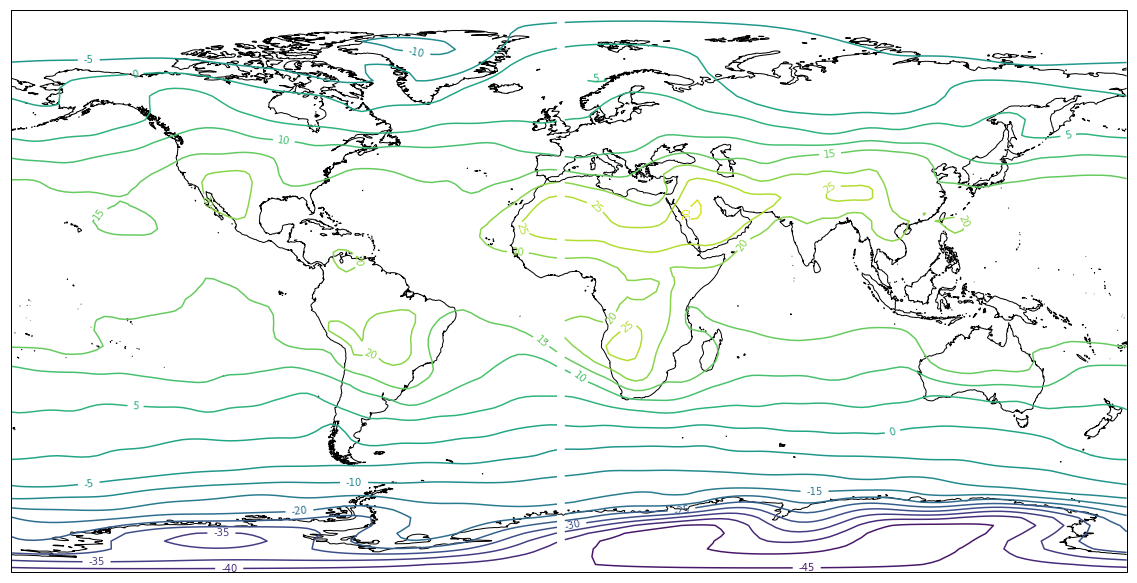

In [13]:
# Map example 1
mapcrs = ccrs.PlateCarree()
datacrs = ccrs.PlateCarree()

fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111,projection=mapcrs)

cs = ax.contour(lon2D,lat2D,temp_850,range(-50,40,5),transform=datacrs)
plt.clabel(cs,fmt='%d')

ax.coastlines('50m')
plt.show()

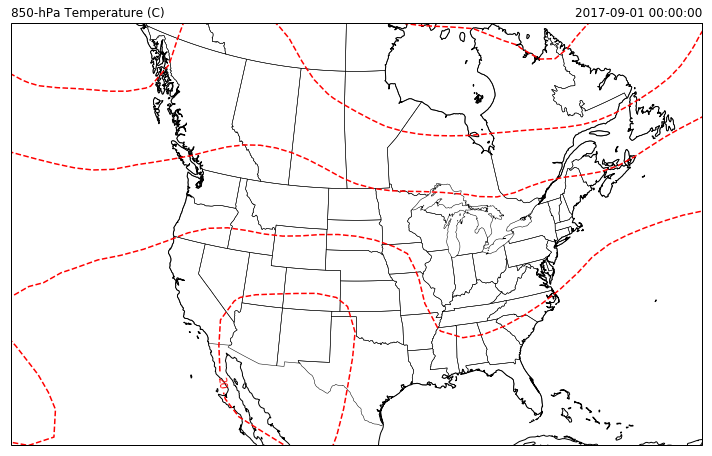

In [14]:
# Map example 2
datacrs = ccrs.PlateCarree()
mapcrs = ccrs.LambertConformal(central_latitude=40, central_longitude=-100)

# Set up figure
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection=mapcrs)
ax.set_extent([-135, -65, 20, 60], ccrs.Geodetic())

# Plot data
cs = ax.contour(lon2D,lat2D,temp_850,range(-50,40,5),
                colors='red',linestyles='dashed',
                transform=datacrs)
plt.clabel(cs,fmt='%d')

# Plot map features
ax.coastlines('50m')
ax.add_feature(states_provinces,edgecolor='black',linewidth=0.5)

# Plot map titles/text
plt.title('850-hPa Temperature (C)', loc='left')
plt.title(vtimes[-1], loc='right')

plt.tight_layout()
plt.show()